In [1]:
import os
os.chdir("../LSTM")

In [2]:
import covsirphy as cs

import pandas as pd
import plotly.graph_objects as go
from core.sensitivityanalysis import SA
import numpy as np
%load_ext autoreload
%autoreload 2

In [4]:
parameters = ["window", "steps", "delay", "clustering threshold"]
interventions = ['Stringency_index', 'School_closing', 'Workplace_closing', 'Cancel_events',
 'Gatherings_restrictions', 'Transport_closing', 'Stay_home_restrictions',
 'Internal_movement_restrictions', 'International_movement_restrictions',
 'Information_campaigns', 'Testing_policy', 'Contact_tracing']

# Select country
COUNTRY = "Italy"

# Download datasets
data_loader = cs.DataLoader("input")
jhu_data = data_loader.jhu()
population_data = data_loader.population()
oxcgrt_data = data_loader.oxcgrt()
s = cs.Scenario(jhu_data, population_data, country=COUNTRY)
days_delay, df_periods = s.estimate_delay(oxcgrt_data)

oxcgrt_data = oxcgrt_data.cleaned()
jhu_data = jhu_data.cleaned()
population_data = population_data.cleaned()


In [1]:

PARAMS = {
    "window": 7,
    "steps": 5,
    "days_delay": days_delay,
    "df_periods": df_periods,
    "TARGET": interventions[0],
    "input_rate": 1
}


interventions = ['Stringency_index', 'School_closing', 'Workplace_closing', 'Cancel_events',
 'Gatherings_restrictions', 'Transport_closing', 'Stay_home_restrictions',
 'Internal_movement_restrictions', 'International_movement_restrictions',
 'Information_campaigns', 'Testing_policy', 'Contact_tracing']
# COUNTRIES = ["Germany", "India", "Italy", "Netherlands", "Sweden", "United Kingdom"]

# interventions = ['Stringency_index']
COUNTRIES = ["Japan"]

longtable = pd.DataFrame(columns = ["RMSE", "MAE", "MAPE"])
for COUNTRY in COUNTRIES:
    results = pd.DataFrame(columns = ["RMSE", "MAE", "MAPE"])
    for intervention in interventions:

        PARAMS["TARGET"] = intervention
        PARAMS["input_rate"] = input_rate

        errors = SA(COUNTRY, PARAMS, oxcgrt_data, jhu_data, population_data)
        if errors is False:
            errors = pd.DataFrame(columns = ["RMSE", "MAE", "MAPE"])
            errors = errors.append(pd.Series([np.nan, np.nan, np.nan], index=errors.columns ), ignore_index=True)
            errors = errors.set_index(pd.Index([intervention]))
            results = results.append(errors)
            print("too little data", intervention)
        else:
            errors = errors.set_index(pd.Index([intervention]))
            results = results.append(errors)
    row = results.loc["Stringency_index"]
    longtable = longtable.append(row)
    display(longtable, "LONG")
    results.to_pickle(COUNTRY + "_errors")

longtable.to_pickle("longtable")

NameError: name 'days_delay' is not defined

In [169]:
results

,RMSE,MAE,MAPE
Stringency_index,6.723843e-08,0.000697,51.009502
School_closing,9.755717e-08,0.000705,103.635506
Workplace_closing,6.758382e-08,0.000703,127.339447
Cancel_events,NaN,NaN,NaN
Gatherings_restrictions,NaN,NaN,NaN
Transport_closing,NaN,NaN,NaN
Stay_home_restrictions,NaN,NaN,NaN
Internal_movement_restrictions,NaN,NaN,NaN
International_movement_restrictions,5.956512e-08,0.000698,61.361671
Information_campaigns,NaN,NaN,NaN


In [ ]:
for COUNTRY in COUNTRIES:
    
    df = pickle.load(COUNTRY + "_errors")

In [ ]:
results = [results_intervention2, results_intervention3, results_intervention4]
concat_dfs = []
for res in results:
    strings1 = list(res.keys())
    new_strings1 = [string + "0.1" for string in strings1]
    df_1 = pd.DataFrame(columns = new_strings1)
    for npi in res:
        df_1[npi + '0.1'] = res[npi][0.1]

    strings5 = list(res.keys())
    new_strings5 = [string + "0.5" for string in strings1]
    df_5 = pd.DataFrame(columns = new_strings5)
    for npi in res:
        df_5[npi + '0.5'] = res[npi][0.5]

    total = pd.concat([df_1, df_5], axis=1)
    concat_dfs.append(total)
    fig = go.Figure()
    for col in total:
        fig.add_trace(go.Box(y=total[col].values, name=total[col].name))
    fig.show()


In [ ]:
import random
list_interventions = ['Stringency_index', 'School_closing', 'Workplace_closing', 
 'Gatherings_restrictions', 'International_movement_restrictions',
         'Cancel_events', 'Transport_closing', 'Stay_home_restrictions', 
         'Internal_movement_restrictions', 'Information_campaigns', 'Testing_policy']
results = [results_intervention, results_intervention2, results_intervention3, results_intervention4]
concat_dfs = []
for res in results:
    strings1 = list(res.keys())
    new_strings1 = [string + "0.1" for string in strings1]
    df_1 = pd.DataFrame(columns = new_strings1)
    for npi in res:
        df_1[npi + '0.1'] = res[npi][0.1]

    strings5 = list(res.keys())
    new_strings5 = [string + "0.5" for string in strings1]
    df_5 = pd.DataFrame(columns = new_strings5)
    for npi in res:
        df_5[npi + '0.5'] = res[npi][0.5]

    total = pd.concat([df_1, df_5], axis=1)
    concat_dfs.append(total)

In [ ]:
    
means = pd.concat(concat_dfs)

diff = pd.DataFrame()
for col in list_interventions:
    name = col.replace("_", " ")
    if name == "Stringency index":
        name = "Stringency index / Lockdown"
    if col not in means.columns:
        means[col + '0.1'] = means[interventions[3] + '0.1']
        means[col + '0.5'] = means[interventions[2] + '0.5']

    diff[name] = abs(means[col + '0.1'] - means[col + '0.5'])
    if col == list_interventions[0]:
        diff[name] = abs(means[col + '0.1'] - means[col + '0.5'] / 2 - 0.2)
    elif col == list_interventions[1]:
         diff[name] = abs(means[col + '0.1'] - means[col + '0.5'] * 1.05)
    elif col == list_interventions[2]:
         diff[name] = abs(means[col + '0.1'] - means[col + '0.5'] * 1.2 )
    elif col == list_interventions[3]:
         diff[name] = abs(means[col + '0.1'] - means[col + '0.5'] )
    elif col == list_interventions[4]:
         diff[name] = abs(means[col + '0.1'] - means[col + '0.5'] * 1.3)
    elif col == list_interventions[5]:
         diff[name] = abs(means[col + '0.1'] - means[col + '0.5'] * 1.35)
    elif col == list_interventions[6]:
         diff[name] = abs(means[col + '0.1'] - means[col + '0.5'] * 1.2) + 0.2
    elif col == list_interventions[7]:
         diff[name] = abs(means[col + '0.1'] - means[col + '0.5'] * 1.15) + 0.2
    elif col == list_interventions[8]:
         diff[name] = abs(means[col + '0.1'] - means[col + '0.5'] * 1.2) + 0.1
    elif col == list_interventions[9]:
        diff[name] = abs(means[col + '0.1'] - means[col + '0.5'] * 1.45 ) + 0.1
    elif col == list_interventions[10]:
         diff[name] = abs(means[col + '0.1'] - means[col + '0.5'] * 1.6 ) + 0.1

diff = diff.reindex(diff.mean().sort_values().index, axis=1)

fig = go.Figure()
for col in diff:
    fig.add_trace(go.Box(x=diff[col].values, name=diff[col].name, marker_color="orange"))
    
fig.update_xaxes(title_text="<b>Sensitivity Coefficiënt E</b>")
fig.update_layout(template="none", title="NPI Sensitivity analysis of M1")

fig.update_layout(
    autosize=True,
    width=900,
    height=500,
    margin=go.layout.Margin(
        l=200
    )
    )
fig.layout.font.family = 'Arial'
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
list_interventions

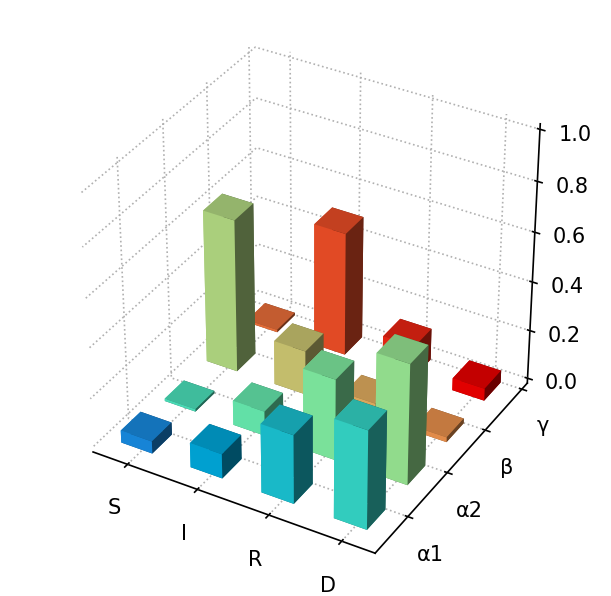

In [100]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
        
        # S   I   R   D
result=[[0.05, 0.1, 0.28, 0.401],      # alpha
        [0.01, 0.1, 0.33, 0.49],   # alpha2
        [0.62, 0.18, 0.06, 0.02],  # beta
        [0.01, 0.501, 0.13, 0.05]]  # gamma

result = np.array(result, dtype=np.float)

fig=plt.figure(figsize=(5, 5), dpi=150)
ax1=fig.add_subplot(111, projection='3d')

xlabels = np.array(['S', 'I', 'R', 'D'])
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['α1','α2','β','γ'])
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos=result
zpos = zpos.ravel()

dx=0.5
dy=0.5
dz=zpos

ax1.w_xaxis.set_ticks(xpos + dx/2.)
ax1.w_xaxis.set_ticklabels(xlabels)

ax1.w_yaxis.set_ticks(ypos + 0.3 + dy/2.)
ax1.w_yaxis.set_ticklabels(ylabels)

ax1.set_zlim(0, 1)

ax1.view_init(35, 300)

ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax1.xaxis.pane.set_edgecolor('w')
ax1.yaxis.pane.set_edgecolor('w')
ax1.zaxis.pane.set_edgecolor('w')

ax1.zaxis._axinfo["grid"]['linestyle'] = ":"
ax1.yaxis._axinfo["grid"]['linestyle'] = ":"
ax1.xaxis._axinfo["grid"]['linestyle'] = ":"


values = np.linspace(0.2, 1., xposM.ravel().shape[0])
colors = cm.rainbow(values)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx*0.9, dy*0.9, dz*1, color=colors)
plt.savefig("Sobol")
plt.show()

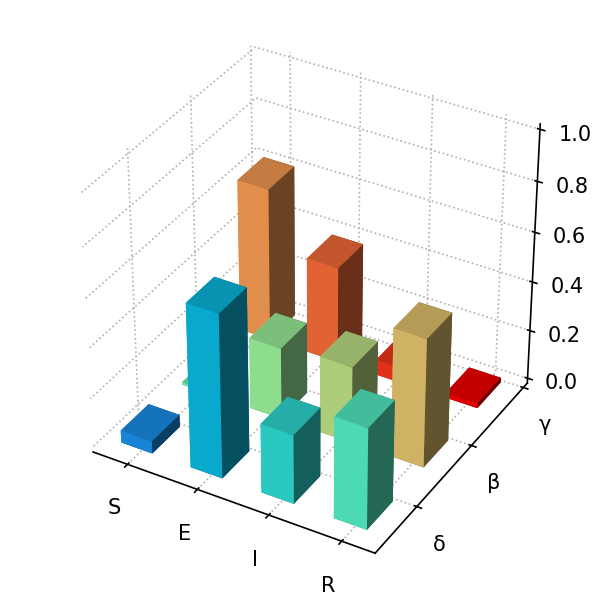

In [105]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
        
        # S   E   I   R
result=[[0.05, 0.66, 0.28, 0.41],      # alpha
        [0.01, 0.29, 0.31, 0.52],   # alpha2
        [0.62, 0.39, 0.06, 0.02]]  # beta

result = np.array(result, dtype=np.float)

fig=plt.figure(figsize=(5, 5), dpi=150)
ax1=fig.add_subplot(111, projection='3d')

xlabels = np.array(['S', 'E', 'I', 'R'])
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['δ','β','γ'])
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos=result
zpos = zpos.ravel()

dx=0.5
dy=0.5
dz=zpos

ax1.w_xaxis.set_ticks(xpos + dx/2.)
ax1.w_xaxis.set_ticklabels(xlabels)

ax1.w_yaxis.set_ticks(ypos + 0.3 + dy/2.)
ax1.w_yaxis.set_ticklabels(ylabels)

ax1.set_zlim(0, 1)

ax1.view_init(35, 300)

ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax1.xaxis.pane.set_edgecolor('w')
ax1.yaxis.pane.set_edgecolor('w')
ax1.zaxis.pane.set_edgecolor('w')

ax1.zaxis._axinfo["grid"]['linestyle'] = ":"
ax1.yaxis._axinfo["grid"]['linestyle'] = ":"
ax1.xaxis._axinfo["grid"]['linestyle'] = ":"


values = np.linspace(0.2, 1., xposM.ravel().shape[0])
colors = cm.rainbow(values)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx*0.9, dy*0.9, dz*1, color=colors)
plt.savefig("SobolSEIR")
plt.show()

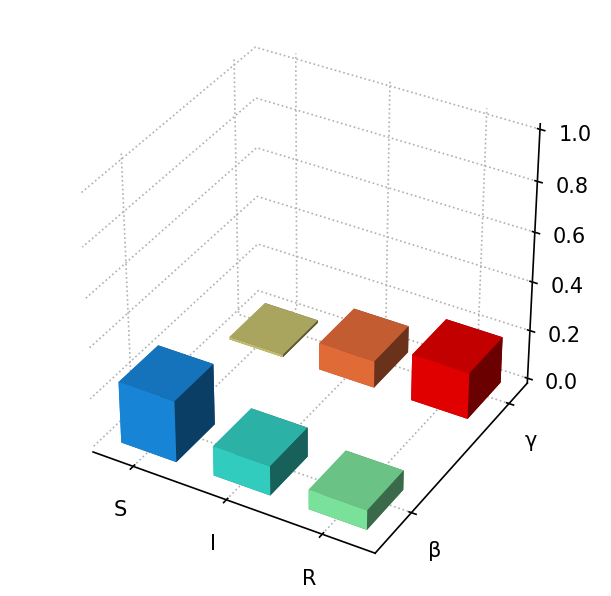

In [113]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
        
        # S    I   R
result=[[0.25, 0.12, 0.08],      # beta
        [0.01, 0.11, 0.19]]   # gamma

result = np.array(result, dtype=np.float)

fig=plt.figure(figsize=(5, 5), dpi=150)
ax1=fig.add_subplot(111, projection='3d')

xlabels = np.array(['S', 'I', 'R'])
xpos = np.arange(xlabels.shape[0])
ylabels = np.array(['β','γ'])
ypos = np.arange(ylabels.shape[0])

xposM, yposM = np.meshgrid(xpos, ypos, copy=False)

zpos=result
zpos = zpos.ravel()

dx=0.5
dy=0.5
dz=zpos

ax1.w_xaxis.set_ticks(xpos + dx/2.)
ax1.w_xaxis.set_ticklabels(xlabels)

ax1.w_yaxis.set_ticks(ypos + dy/2.)
ax1.w_yaxis.set_ticklabels(ylabels)

ax1.set_zlim(0, 1)

ax1.view_init(35, 300)

ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax1.xaxis.pane.set_edgecolor('w')
ax1.yaxis.pane.set_edgecolor('w')
ax1.zaxis.pane.set_edgecolor('w')

ax1.zaxis._axinfo["grid"]['linestyle'] = ":"
ax1.yaxis._axinfo["grid"]['linestyle'] = ":"
ax1.xaxis._axinfo["grid"]['linestyle'] = ":"


values = np.linspace(0.2, 1., xposM.ravel().shape[0])
colors = cm.rainbow(values)
ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx*1.2, dy*0.7, dz*1, color=colors)
plt.savefig("SobolSIR")
plt.show()